In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

In [3]:
transaction.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [4]:
city.head(5)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
customer.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
df1 = pd.merge(transaction,cab_data)
df2 = pd.merge(df1, customer)
df3 = pd.merge(df2, city)
df3.shape

(359392, 14)

In [9]:
# Final master dataset
df3.head(5)

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,"814,885","24,701"
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,"814,885","24,701"
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,"814,885","24,701"
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,"814,885","24,701"
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,"814,885","24,701"


In [10]:
df3['Date of Travel'] = pd.to_datetime(df3['Date of Travel'], origin='1899-12-30', unit='D')

In [11]:
df3['Year'] = df3['Date of Travel'].dt.year
df3

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Year
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,"814,885","24,701",2016
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,"814,885","24,701",2018
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,"814,885","24,701",2018
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,"814,885","24,701",2016
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,"814,885","24,701",2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,Female,29,6829,"418,859","127,001",2018
359388,10319775,51406,Cash,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,Female,29,6829,"418,859","127,001",2018
359389,10347676,51406,Card,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,Female,29,6829,"418,859","127,001",2018
359390,10358624,51406,Cash,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,Female,29,6829,"418,859","127,001",2018


In [12]:
# Converting object data type to desired data types
df3['Payment_Mode'] = df3['Payment_Mode'].astype('category')
df3['Gender'] = df3['Gender'].astype('category')
df3['Company'] = df3['Company'].astype('category')
df3['City'] = df3['City'].astype('category')
df3['Population'] = pd.to_numeric(df3['Population'], errors = 'coerce') .astype('Int64')
df3['Users'] = pd.to_numeric(df3['Users'], errors = 'coerce').astype('Int64')

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  category      
 3   Date of Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  category      
 5   City                359392 non-null  category      
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Gender              359392 non-null  category      
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          0 non-null       Int64         
 13  Users               0 non-nul

In [13]:
# Missing values calculation
df3.isnull().sum()

Transaction ID             0
Customer ID                0
Payment_Mode               0
Date of Travel             0
Company                    0
City                       0
KM Travelled               0
Price Charged              0
Cost of Trip               0
Gender                     0
Age                        0
Income (USD/Month)         0
Population            359392
Users                 359392
Year                       0
dtype: int64

In [14]:
# check duplication
df3.nunique()

Transaction ID        359392
Customer ID            46148
Payment_Mode               2
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Gender                     2
Age                       48
Income (USD/Month)     22725
Population                 0
Users                      0
Year                       3
dtype: int64

# bar_plot() to plot the countplot for various visulaisations related to both the companies 


In [16]:
def bar_plot(df, xcol, ycol):
    plt.figure(figsize=(5,4))
    sns.countplot(x=xcol, hue=ycol, data = df, color='navy')
    plt.ylabel("Frequency")
    #plt.title(col.Name)
    plt.show()

# company vs payment mode analysis
# From the below graph we can infer that the users is more for yellow cab. Also the payment mode preferred for both the companies is card than cash which means its better to invest in a company where advanced and digital technologies is being used.

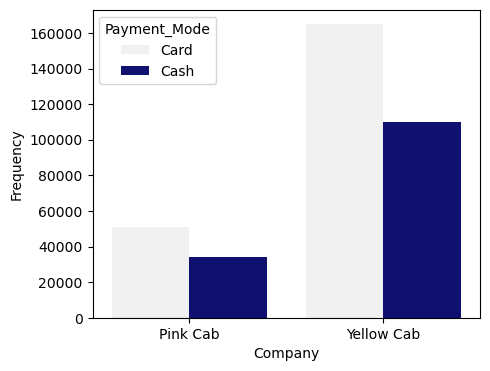

In [17]:
bar_plot(df3,df3['Company'], df3['Payment_Mode'])

# Company vs gender analysis
# From this analysis there is a significant increase in male users than female users.

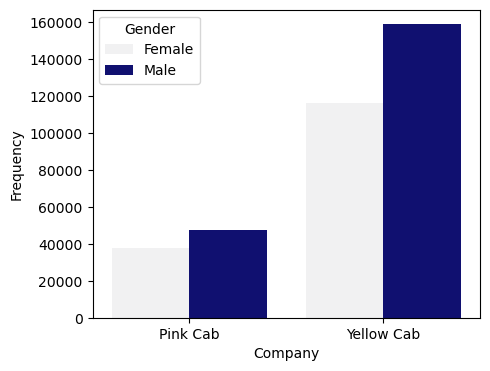

In [18]:
bar_plot(df3, df3['Company'],df3['Gender'])

# Company vs Year wise analysis
# There is significant amount of increase in cab users as the year goes by and the no of users is higher in yellow cab.

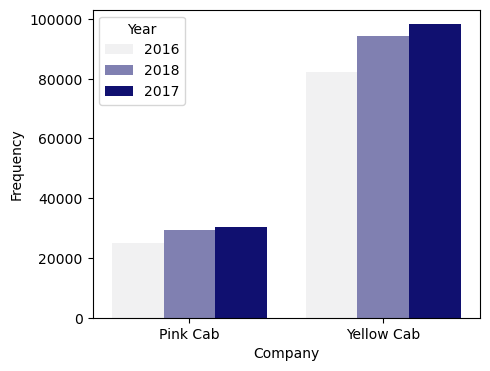

In [19]:
bar_plot(df3, df3['Company'], df3['Year'].astype(str))

# Visualising the Profit analysis of both companies
# During the 3 year period the cost of trip and price charged is more for yellow cab than pink cab which means yellow cab is providing better plan for all kind of customers.
# Hence the client should invest in yellow cab.

In [20]:
#lets visualize this profit difference
yellow_cab = df3[df3['Company']=='Yellow Cab']
yellow_cab_cost = yellow_cab.groupby('Year')['Cost of Trip'].mean()
yellow_cab_price = yellow_cab.groupby('Year')['Price Charged'].mean()
print(yellow_cab_cost)

# Calculate the average cost of the trip and price charged for each year for Pink Cab
pink_cab = df3[df3['Company']=='Pink Cab']
pink_cab_cost = pink_cab.groupby('Year')['Cost of Trip'].mean()
pink_cab_price = pink_cab.groupby('Year')['Price Charged'].mean()

Year
2016    298.570481
2017    297.822893
2018    297.459436
Name: Cost of Trip, dtype: float64


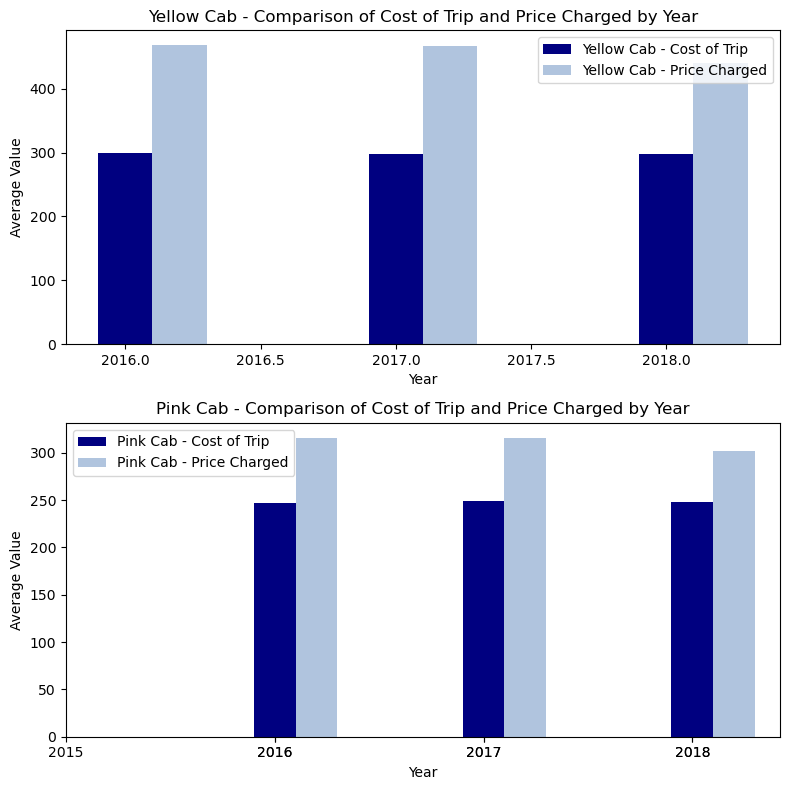

In [21]:
# Bar plots of Cost of trip and price charged for both cabs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
bar_width=0.2

# Plotting for Yellow Cab
ax1.bar(yellow_cab_cost.index, yellow_cab_cost, bar_width, label='Yellow Cab - Cost of Trip', color='navy')
ax1.bar(yellow_cab_price.index + bar_width, yellow_cab_price, bar_width, label='Yellow Cab - Price Charged', color='lightsteelblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Value')
ax1.set_title('Yellow Cab - Comparison of Cost of Trip and Price Charged by Year')
ax1.legend(loc='best')
plt.xticks([int(x) for x in ax1.get_xticks()])

# Plotting for Pink Cab
ax2.bar(pink_cab_cost.index, pink_cab_cost, bar_width, label='Pink Cab - Cost of Trip', color='navy')
ax2.bar(pink_cab_price.index + bar_width, pink_cab_price, bar_width, label='Pink Cab - Price Charged', color='lightsteelblue')
plt.xticks([int(x) for x in ax2.get_xticks()])
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Value')
ax2.set_title('Pink Cab - Comparison of Cost of Trip and Price Charged by Year')
ax2.legend()

plt.tight_layout()
plt.show()